# Machine Learning - Outliers
Notes on Machine Learning and outliers based on Udacity's Introduction to Machine Learning course.

##### What Causes Outliers?
<li> Sensor malfunction </li>
<li> Freak events </li>
<li> Data entry error </li>
<li> ...and much more </li>

##### So how are outliers dealt with?
The basic strategy look like this:
1. Train the regression with the outliers in the data
2. Calculate the error between the actual values and the predicted values
3. Remove 10% of the total data points which have the largest error
4. Train the regression again and investigate
5. Repeat as necessary

###### Below are a few examples of identifying and removing outlier points from a data set:

In [1]:
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

%cd /Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/outliers

/Users/IanDeniset/Documents/Courses/Udacity_IntroML/ud120-projects/outliers


#### Load and prepare the data

In [2]:
#load up practice data with outliers in it
ages = pickle.load(open("practice_outliers_ages.pkl", "r"))
net_worths = pickle.load(open("practice_outliers_net_worths.pkl", "r"))

In [3]:
#ages and net_worths need to be reshaped into 2D numpy arrays
ages = numpy.reshape(numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape(numpy.array(net_worths), (len(net_worths), 1))

In [4]:
#split the data into train and test sets
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages,
                                                                            net_worths, test_size=0.1, random_state=42)

#### Create, train, and predict with Linear Regression 

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)
pred = reg.predict(ages_test)

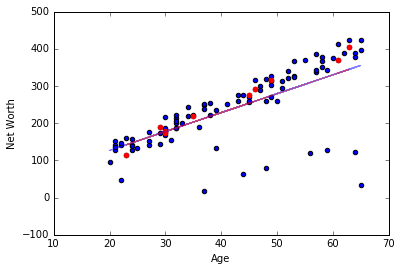

In [6]:
#plot the data and regression line
plt.plot(ages, reg.predict(ages), color="blue", alpha=0.5)
plt.scatter(ages, net_worths)
plt.plot(ages_test, reg.predict(ages_test), color='r', alpha=0.5)
plt.scatter(ages_test, net_worths_test, color='r')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.show()

As can be seen, there are a large number of outliers that are causing a poor fit of the data.  Before we remove the data, let's take a look at the slope and the R^2 value for the current regression:

In [7]:
#find the slope and intercept of the line
print('The coefficient or slope of the linear regression is: ', reg.coef_)
print('The intercept of the linear regression is: ', reg.intercept_)

('The coefficient or slope of the linear regression is: ', array([[ 5.07793064]]))
('The intercept of the linear regression is: ', array([ 25.21002155]))


In [8]:
#find the true R^2 value by comparing the test features and test targets
print('The score of the linear fit is: ', reg.score(ages_test, net_worths_test))

('The score of the linear fit is: ', 0.8782624703664671)


### Remove outliers and rerun the regression

Create a function that will load in the predicted values from the previous regression, calculate the error between the true values and the predicted ones then discard 10% of the points with the highest error:

In [9]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []
    
    #calculate absolute error
    err = abs(predictions - net_worths)
    #zip combines lists to tuples
    data = zip(ages, net_worths, err)
    #sort the data by error
    data_sorted = sorted(data, key=lambda index: index[2])
    
    cleaned_data = data_sorted[:80]
    
    return cleaned_data

##### Run the function to remove the outliers

In [10]:
predictions = reg.predict(ages_train)
cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)

##### Run the linear regression on the cleaned data

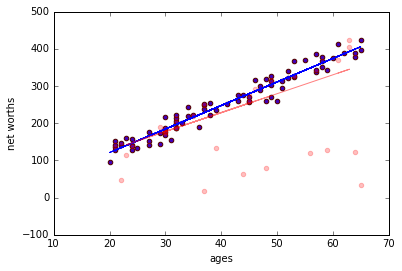

In [11]:
ages_clean, net_worths_clean, errors = zip(*cleaned_data)
ages_clean = numpy.reshape( numpy.array(ages_clean), (len(ages_clean), 1))
net_worths_clean = numpy.reshape(numpy.array(net_worths_clean), (len(net_worths_clean), 1))

### refit your cleaned data!
reg_clean = linear_model.LinearRegression()
reg_clean.fit(ages_clean, net_worths_clean)

#plot the new data fit
plt.plot(ages_clean, reg_clean.predict(ages_clean), color="blue")
plt.scatter(ages_clean, net_worths_clean)
plt.plot(ages_test, pred, color='r', alpha=0.5)
plt.scatter(ages, net_worths, color='r', alpha=0.25)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

As expected, the fit of the linear regression after removing some of the outliers is much better.  Let's calculate some metrics below to see just how much better the fit is:

In [12]:
#find the slope and intercept of the line
print('The coefficient or slope of the linear regression is: ', reg.coef_)
print('The intercept of the linear regression is: ', reg.intercept_)

#find the true R^2 value by comparing the test features and test targets
print('The score of the linear fit is: ', reg.score(ages_test, net_worths_test))

('The coefficient or slope of the linear regression is: ', array([[ 5.07793064]]))
('The intercept of the linear regression is: ', array([ 25.21002155]))
('The score of the linear fit is: ', 0.8782624703664671)


### Looking at Enron Data Outliers

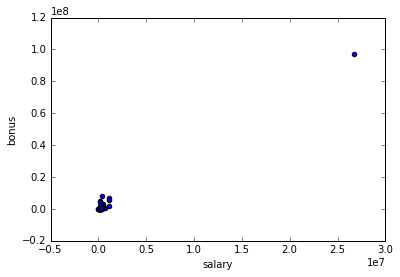

In [13]:
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


#read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

Well that's a pretty big outlier.  Turns out it's the TOTAL value from the spreadsheet.  Let's remove it and re plot the data:

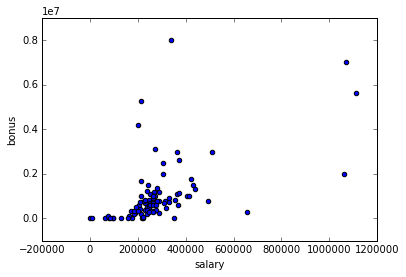

In [14]:
#remove the key 'TOTAL'
data_dict.pop('TOTAL',0)

data_noTOTAL = featureFormat(data_dict, features)

for point in data_noTOTAL:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

Let's identify those people who made a salary over 1 million and bonus of 5 million:

In [15]:
for poi in data_dict.keys():
    if (data_dict[poi]['salary'] > 1000000) and (data_dict[poi]['bonus'] > 5000000):
        if (data_dict[poi]['salary'] != 'NaN') and (data_dict[poi]['bonus'] != 'NaN'):
            print poi, data_dict[poi]['salary'], data_dict[poi]['bonus']

LAY KENNETH L 1072321 7000000
SKILLING JEFFREY K 1111258 5600000
